In [19]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotmean import plot_mean_and_CI
from plotmean import LegendObject
from matplotlib.colors import colorConverter as cc
import matplotlib.patches as mpatches

sns.set()


In [20]:
folder_array=['ant', 'halfcheetah', 'hopper', 'walker']
env_array=['Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Walker2d-v2']
par=['exploreNoise', 'polNoise', 'tau', 'polfreq']
par_leg=['en', 'pn', 't', 'pf']
colors_array=['red', 'blue', 'yellow']

seed_array=[1, 2, 3]
exploreNoise_array=[0.05, 0.1, 0.2]
polNoise_array=[0.1, 0.2, 0.3]
tau_array=[0.001, 0.005, 0.01]
polfreq_array=[1, 4, 8]

In [21]:
#Name dictionary
name_dict={}
name_dict['pol_name']='TD3'
name_dict['discount']='0.99'
name_dict['noise_clip']='0.5'

name_dict['env']='Ant-v2'
name_dict['seed']='1'
name_dict['exploreNoise']='0.1'
name_dict['tau']='0.005'
name_dict['polNoise']='0.2'
name_dict['tau']='0.005'
name_dict['polfreq']='4'


def reset_dict(name_dict):
    name_dict['pol_name']='TD3'
    name_dict['discount']='0.99'
    name_dict['noise_clip']='0.5'

    name_dict['env']='Ant-v2'
    name_dict['seed']='1'
    name_dict['exploreNoise']='0.1'
    name_dict['tau']='0.005'
    name_dict['polNoise']='0.2'
    name_dict['tau']='0.005'
    name_dict['polfreq']='4'
    
    return name_dict
    

In [22]:
#Reset dictionary
name_dict=reset_dict(name_dict)
#Select environment
#-----------------------------------------#
env_num=0   # 0: Ant-v2, 1: HalfCheetah-v2, 2: Hopper, 3: Walker
#-----------------------------------------#

my_env=env_array[env_num]
my_folder=folder_array[env_num]
name_dict['env']=my_env
print('You have selected ' + env_array[env_num])

#Selct parameter to plot
#------------------------------------------#
par_num=3  #0: exploreNoise, 1: polNoise , 2: tau, 3: polfreq 
#-------------------------------------------#

my_par=par[par_num]
parameter_array=eval(my_par+'_array')

print('You have selected ' + my_par)
print(parameter_array)
print('Dictionary resetted')

######################################################################
######################################################################

#number of items in parameter array
n=len(parameter_array)

#Specify all containers
filepath_list = [[] for x in range(n)]
A_list=[[] for x in range(n)]
rewards_list=[[] for x in range(n)]
timesteps_list=[[] for x in range(n)]

m_list=[]
ub_list=[]
lb_list=[]

#printing to test
print(filepath_list)

######################################################################
######################################################################

for index, parameter in enumerate(parameter_array):
    for seed in seed_array:
        
        name_dict['seed']=str(seed)
        name_dict[str(par[par_num])]=str(parameter)
    
        filename=name_dict['pol_name']+'_'+name_dict['env']+'_'+\
                            name_dict['seed']+'_'+name_dict['exploreNoise']+\
                            '_' + name_dict['discount'] + '_' +\
                            name_dict['tau'] + '_' + name_dict['polNoise'] + '_' + \
                            name_dict['noise_clip'] + '_' + \
                            name_dict['polfreq'] +'_COMPLETE.npy'

        filepath = '/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/'+ \
            'env/'+my_folder+'/results/'+filename

        print(filepath)
        print(os.path.exists(filepath))
        
        filepath_list[index].append(filepath)

for i in np.arange(n):
    for file in filepath_list[i]:
        A=np.load(file)
        A_list[i].append(A)
    

for i in np.arange(n):
    for A in A_list[i]:
        arr_len=len(A)
        #print(A[-1])
        rewards=np.zeros(arr_len)
        timesteps=np.zeros(arr_len)
        for j in np.arange(arr_len):
            timesteps[j]=A[j][1]
            rewards[j]=A[j][0]
        timesteps_list[i].append(timesteps)
        rewards_list[i].append(rewards)




for i in range(n):

    m_list.append((np.asarray(rewards_list[i][0])+np.asarray(rewards_list[i][1])+\
        np.asarray(rewards_list[i][2]))/3)
    lb_list.append(np.minimum.reduce([np.asarray(rewards_list[i][0]), \
                                 np.asarray(rewards_list[i][1]), \
                                     np.asarray(rewards_list[i][2])]))
    ub_list.append(np.maximum.reduce([np.asarray(rewards_list[i][0]), np.asarray(rewards_list[i][1]), \
                     np.asarray(rewards_list[i][2])]))


You have selected Ant-v2
You have selected polfreq
[1, 4, 8]
Dictionary resetted
[[], [], []]
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_1_0.1_0.99_0.005_0.2_0.5_1_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_2_0.1_0.99_0.005_0.2_0.5_1_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_3_0.1_0.99_0.005_0.2_0.5_1_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_1_0.1_0.99_0.005_0.2_0.5_4_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_2_0.1_0.99_0.005_0.2_0.5_4_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_3_0.1_0.99_0.005_0.2_0.5_4_COMPLETE.npy
True
/home/rajat/Documents/MS/Spring 2018/CSE 599/final_project/TD3/env/ant/results/TD3_Ant-v2_1_0.1_

{0: <plotmean.LegendObject object at 0x7f83d4167eb8>, 1: <plotmean.LegendObject object at 0x7f83d416f5c0>, 2: <plotmean.LegendObject object at 0x7f83d416fd68>}


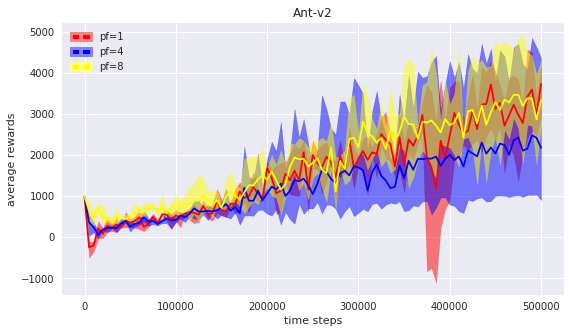

In [23]:
plt.figure(figsize=(9,5))

bg = np.array([1, 1, 1])  # background of the legend is white
legend_map={}
legend_num=[]
legend_string=[]

for i in np.arange(n):
    color=colors_array[i]
    plot_mean_and_CI(m_list[i], ub_list[i], lb_list[i], color_mean=color, color_shading=color)
    plt.xticks(np.arange(0, 101, 20), np.arange(0,500001, 100000))
    
    color_faded = (np.array(cc.to_rgb(color)) + bg) / 2.0
    legend_num.append(i)
    leg = par_leg[par_num] + '=' + str(parameter_array[i])
    legend_string.append(leg)
    legend_map[i]=LegendObject(color, color_faded, dashed=True)
                    
print(legend_map)
plt.legend(legend_num, legend_string,handler_map=legend_map, loc='upper left')

plt.xlabel('time steps')
plt.ylabel('average rewards')
my_title=my_env
plt.title(my_title)
imagename='figures/' + my_env + '_' + my_par
#plt.savefig(imagename, dpi=300)



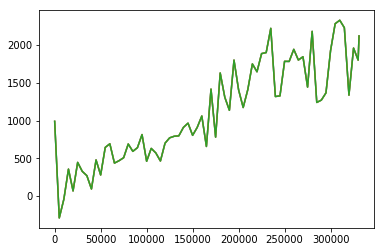